In [ ]:
import os
from pathlib import Path

os.chdir('/content/drive/MyDrive/ML/hw4')
IMAGES = Path.cwd() / 'images'

from utils import *

import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
cities, cities2idx, idx2cities, dist_mat = load_data(q2=True)

dist_mat

matrix([[   0,  206,  429, 1504,  963, 2976, 3095, 2979, 1949],
        [ 206,    0,  233, 1308,  802, 2815, 2934, 2786, 1771],
        [ 429,  233,    0, 1075,  671, 2684, 2799, 2631, 1616],
        [1504, 1308, 1075,    0, 1329, 3273, 3053, 2687, 2037],
        [ 963,  802,  671, 1329,    0, 2013, 2142, 2054,  996],
        [2976, 2815, 2684, 3273, 2013,    0,  808, 1131, 1307],
        [3095, 2934, 2799, 3053, 2142,  808,    0,  379, 1235],
        [2979, 2786, 2631, 2687, 2054, 1131,  379,    0, 1059],
        [1949, 1771, 1616, 2037,  996, 1307, 1235, 1059,    0]])

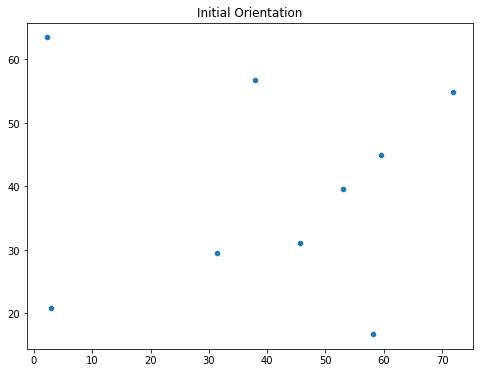

In [ ]:
np.random.seed(64)
x = np.random.rand(9,2)*100

plt.figure(figsize=(8,6))
sns.scatterplot(x=x[:,0], y=x[:,1])
plt.title('Initial Orientation');

In [ ]:
iter = 0
loss = []

while True:
    for i in range(9):
        g = gradient(dist_mat, x, i)
        update(x, i, g, lr=.1/4)
        
    loss.append(obj(dist_mat, x))

    if iter%10 == 0:
        print(f'iter:{iter}\t\t obj:{loss[-1]}')

    if iter > 1000:
        print('Ran for maximum number of iterations')
        break
    
    if iter < 1 or np.abs(loss[-1]-loss[-2]) > .00001:
        iter += 1
    else:
        print(f'\nStopping criterion achieved. Last loss:{loss[-2]:.4f} \nCurrent loss:{loss[-1]:4f}\nDiff: {np.abs(loss[-1]-loss[-2]):.4f}')
        break
        


iter:0		 obj:147247304.4749691
iter:10		 obj:243560.52254642808
iter:20		 obj:68248.06041388605
iter:30		 obj:56861.07649261424
iter:40		 obj:56411.43007808471
iter:50		 obj:56379.96361783473
iter:60		 obj:56375.28448406001
iter:70		 obj:56374.361590577835
iter:80		 obj:56374.15517136124
iter:90		 obj:56374.105211987844
iter:100		 obj:56374.092517990466
iter:110		 obj:56374.08920234238
iter:120		 obj:56374.08832342793
iter:130		 obj:56374.08808867026

Stopping criterion achieved. Last loss:56374.0881 
Current loss:56374.088069
Diff: 0.0000


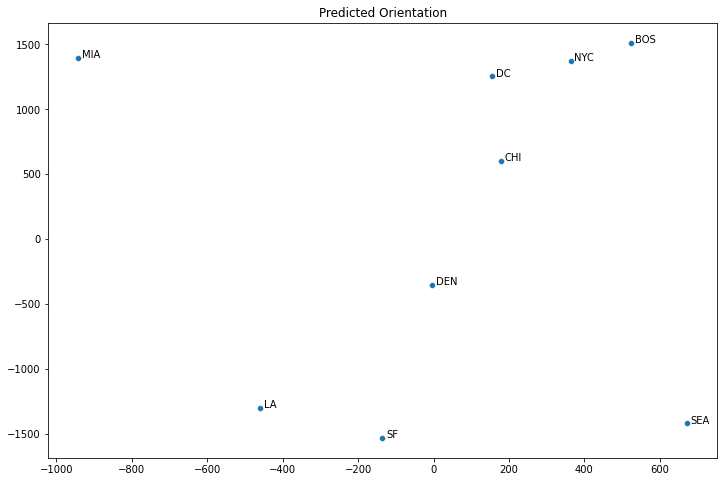

In [ ]:
plt.figure(figsize=(12,8))
sns.scatterplot(x=x[:,0], y=x[:,1])

for i in range(9):
    plt.text(x[i, 0]+10, x[i, 1], cities[i])

plt.title('Predicted Orientation')
plt.savefig(IMAGES/'predicted_orientation.png')